# Customer_Segmentation - Exploratory_rfm_analysis

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load RFM features
olist_rfm = pd.read_csv("../data/processed/olist_rfm.csv")
northwind_rfm = pd.read_csv("../data/processed/northwind_rfm.csv")

In [2]:
# Step 2: Dataset Sanity Check
print("Olist customers:", olist_rfm.shape[0])
print("Northwind customers:", northwind_rfm.shape[0])

olist_rfm.head()

Olist customers: 93357
Northwind customers: 89


,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214


In [3]:
# Step 3: Distribution of R, F, M (Univariate)
# Step 3.1: Olist Distributions
olist_rfm[["recency", "frequency", "monetary"]].describe()


,recency,frequency,monetary
count,93357.000000,93357.000000,93357.000000
mean,237.937155,1.033420,165.198772
std,152.584344,0.209099,226.314579
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.060000
50%,219.000000,1.000000,107.780000
75%,346.000000,1.000000,182.560000
max,695.000000,15.000000,13664.080000


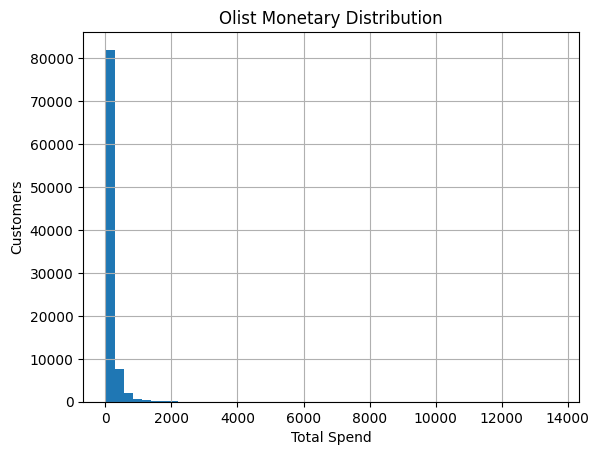

In [18]:
# Visualize Distributions
olist_rfm["monetary"].hist(bins=50)
plt.title("Olist Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customers")
plt.savefig("../visuals/olist_monetary_distribution.png")
plt.show()

In [5]:
# Step 3.2: Northwind Distributions (Benchmark)
northwind_rfm[["recency", "frequency", "monetary"]].describe()

,recency,frequency,monetary
count,89.000000,89.000000,89.000000
mean,52.561798,9.325843,14222.393702
std,87.484278,5.810991,20219.818190
min,1.000000,1.000000,100.800000
25%,9.000000,5.000000,3239.800000
50%,24.000000,8.000000,7048.240000
75%,59.000000,12.000000,16817.097500
max,658.000000,31.000000,110277.305000


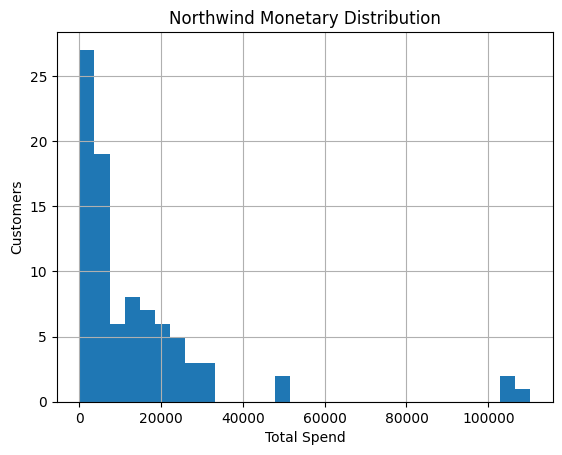

In [19]:
# Visualize Distributions
northwind_rfm["monetary"].hist(bins=30)
plt.title("Northwind Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customers")
plt.savefig("../visuals/northwind_monetary_distribution.png")
plt.show()

In [7]:
# Step 4: Revenue Concentration Analysis
# Step 4.1 Lorenz-Style Revenue Concentration (Olist)
olist_sorted = olist_rfm.sort_values("monetary", ascending=False)
olist_sorted["cum_revenue_share"] = (
    olist_sorted["monetary"].cumsum() / olist_sorted["monetary"].sum()
)
olist_sorted["cum_customer_share"] = (
    np.arange(1, len(olist_sorted) + 1) / len(olist_sorted)
)

olist_sorted.head()

,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score,RFM,cum_revenue_share,cum_customer_share
3724,0a0a92112bd4c708ca5fde585afaa872,334,1,13664.08,2,1,5,215,0.000886,0.000011
79635,da122df9eeddfedc1dc1f5349a1a690c,515,2,7571.63,1,1,5,115,0.001377,0.000021
43168,763c8b1c9c68a0229c42c9fc6f662b93,46,1,7274.88,5,1,5,515,0.001849,0.000032
80462,dc4802a71eae9be1dd28f5d788ceb526,563,1,6929.31,1,1,5,115,0.002298,0.000043
25436,459bef486812aa25204be022145caa62,35,1,6922.21,5,1,5,515,0.002747,0.000054


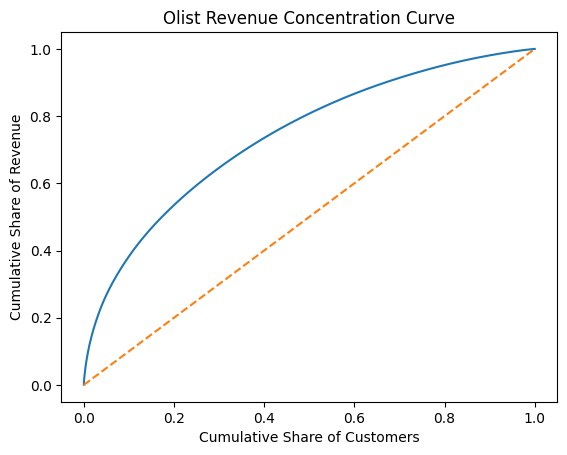

In [20]:
# Visualize Olist Revenue Concentration Curve
plt.plot(
    olist_sorted["cum_customer_share"],
    olist_sorted["cum_revenue_share"]
)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Olist Revenue Concentration Curve")
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Revenue")
plt.savefig("../visuals/olist_revenue_concentration_curve.png")
plt.show()


In [10]:
# Step 4.2: Northwind Comparison 
nw_sorted = northwind_rfm.sort_values("monetary", ascending=False)
nw_sorted["cum_revenue_share"] = (
    nw_sorted["monetary"].cumsum() / nw_sorted["monetary"].sum()
)
nw_sorted["cum_customer_share"] = (
    np.arange(1, len(nw_sorted) + 1) / len(nw_sorted)
)

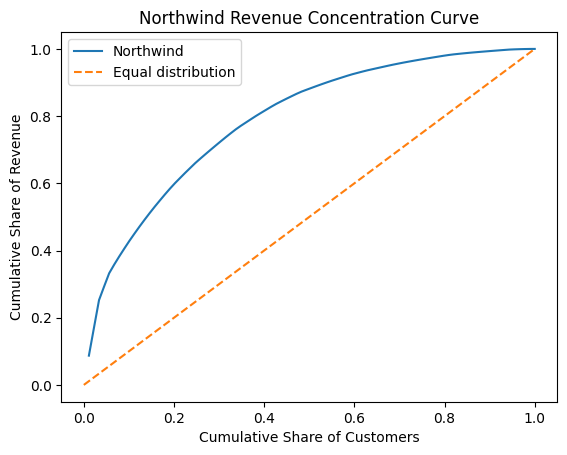

In [21]:
# Visualize Northwind Revenue Concentration Curve
plt.plot(
    nw_sorted["cum_customer_share"],
    nw_sorted["cum_revenue_share"],
    label="Northwind"
)

plt.plot(
    [0, 1],
    [0, 1],
    linestyle="--",
    label="Equal distribution"
)

plt.title("Northwind Revenue Concentration Curve")
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Revenue")
plt.legend()
plt.savefig("../visuals/northwind_revenue_concentration_curve.png")
plt.show()

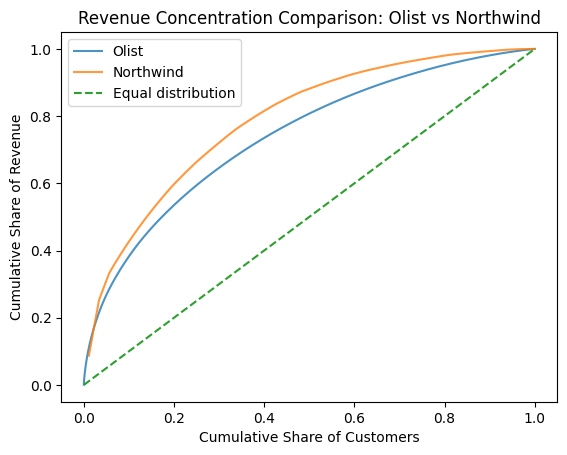

In [22]:
# Step 4.3: Olist vs Northwind Overlay
plt.plot(
    olist_sorted["cum_customer_share"],
    olist_sorted["cum_revenue_share"],
    label="Olist",
    alpha=0.8
)

plt.plot(
    nw_sorted["cum_customer_share"],
    nw_sorted["cum_revenue_share"],
    label="Northwind",
    alpha=0.8
)

plt.plot(
    [0, 1],
    [0, 1],
    linestyle="--",
    label="Equal distribution"
)

plt.title("Revenue Concentration Comparison: Olist vs Northwind")
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Revenue")
plt.legend()
plt.savefig("../visuals/olist_northwind_revenue_concentration_comparison.png")
plt.show()


In [14]:
# Step 5: Frequency vs Monetary Relationship
olist_rfm.groupby("frequency")["monetary"].mean()

frequency
1      160.763556
2      291.025410
3      433.402541
4      788.795714
5      734.181111
6      703.314000
7      946.853333
9     1172.660000
15     879.270000
Name: monetary, dtype: float64

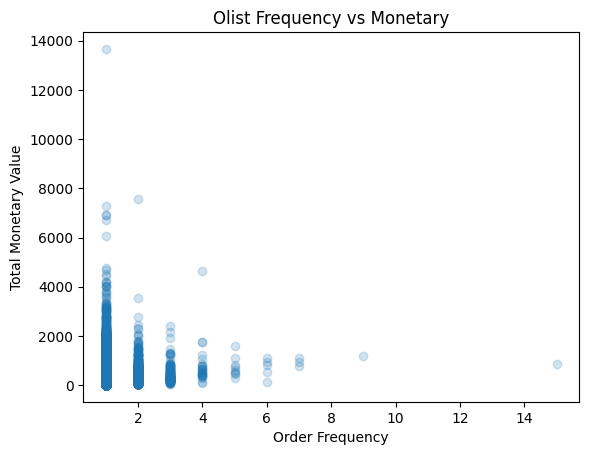

In [15]:
# Visualize Frequency vs Monetary
plt.scatter(
    olist_rfm["frequency"],
    olist_rfm["monetary"],
    alpha=0.2
)
plt.xlabel("Order Frequency")
plt.ylabel("Total Monetary Value")
plt.title("Olist Frequency vs Monetary")
plt.show()


In [16]:
# Step 6: RFM Code Distribution (Descriptive Only)
rfm_counts = (
    olist_rfm
    .groupby("RFM")
    .agg(customers=("customer_unique_id", "count"))
    .sort_values("customers", ascending=False)
)

rfm_counts.head(10)

,customers
RFM,
212,4001
112,3942
311,3905
414,3904
514,3891
111,3888
314,3857
415,3826
515,3815


In [17]:
# Step 7: Exploratory Summary Table
rfm_summary = (
    olist_rfm
    .groupby("RFM")
    .agg(
        customers=("customer_unique_id", "count"),
        total_revenue=("monetary", "sum"),
        avg_recency=("recency", "mean"),
        avg_frequency=("frequency", "mean"),
        avg_monetary=("monetary", "mean")
    )
    .sort_values("total_revenue", ascending=False)
)

rfm_summary.head(10)

,customers,total_revenue,avg_recency,avg_frequency,avg_monetary
RFM,,,,,
415,3826,1730757.98,135.710141,1.105071,452.367480
515,3815,1711243.41,47.072608,1.119790,448.556595
215,3754,1700061.82,316.278903,1.085775,452.866761
115,3711,1639712.18,476.060361,1.061708,441.851840
315,3562,1472264.55,220.317238,1.108366,413.325253
414,3904,647627.87,136.434939,1.040471,165.888286
514,3891,643407.03,46.205089,1.039579,165.357756
314,3857,638021.60,220.294789,1.042779,165.419134
214,3621,597689.33,315.344656,1.040873,165.061952
